# MCB 137L Final Estimate

### Dhuvi Karthikeyan and Shrey Saretha

### Import Libraries and Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate

In [2]:
ie = pd.read_csv('interaction_energies.csv')
ie = ie.rename(columns={"Unnamed: 0": "Residue"})
for i in ie.columns[1:]:
    ie[i] = ie[i].str.replace('_', '-').astype(float)
ie = ie.set_index('Residue')

In [3]:
ie #Interaction energies in kBt

,Cys,Met,Phe,Ile,Leu,Val,Trp,Tyr,Ala,Gly,Thr,Ser,Asn,Gln,Asp,Glu,His,Arg,Lys,Pro
Residue,,,,,,,,,,,,,,,,,,,,
Cys,-5.44,-4.99,-5.80,-5.50,-5.83,-4.96,-4.95,-4.16,-3.57,-3.16,-3.11,-2.86,-2.59,-2.85,-2.41,-2.27,-3.60,-2.57,-1.95,-3.07
Met,-4.99,-5.46,-6.56,-6.02,-6.41,-5.32,-5.55,-4.91,-3.94,-3.39,-3.51,-3.03,-2.95,-3.30,-2.57,-2.89,-3.98,-3.12,-2.48,-3.45
Phe,-5.80,-6.56,-7.26,-6.84,-7.28,-6.29,-6.16,-5.66,-4.81,-4.13,-4.28,-4.02,-3.75,-4.10,-3.48,-3.56,-4.77,-3.98,-3.36,-4.25
Ile,-5.50,-6.02,-6.84,-6.54,-7.04,-6.05,-5.78,-5.25,-4.58,-3.78,-4.03,-3.52,-3.24,-3.67,-3.17,-3.27,-4.14,-3.63,-3.01,-3.76
Leu,-5.83,-6.41,-7.28,-7.04,-7.37,-6.48,-6.14,-5.67,-4.91,-4.16,-4.34,-3.92,-3.74,-4.04,-3.40,-3.59,-4.54,-4.03,-3.37,-4.20
Val,-4.96,-5.32,-6.29,-6.05,-6.48,-5.52,-5.18,-4.62,-4.04,-3.38,-3.46,-3.05,-2.83,-3.07,-2.48,-2.67,-3.58,-3.07,-2.49,-3.32
Trp,-4.95,-5.55,-6.16,-5.78,-6.14,-5.18,-5.06,-4.66,-3.82,-3.42,-3.22,-2.99,-3.07,-3.11,-2.84,-2.99,-3.98,-3.41,-2.69,-3.73
Tyr,-4.16,-4.91,-5.66,-5.25,-5.67,-4.62,-4.66,-4.17,-3.36,-3.01,-3.01,-2.78,-2.76,-2.97,-2.76,-2.79,-3.52,-3.16,-2.60,-3.19
Ala,-3.57,-3.94,-4.81,-4.58,-4.91,-4.04,-3.82,-3.36,-2.72,-2.31,-2.32,-2.01,-1.84,-1.89,-1.70,-1.51,-2.41,-1.83,-1.31,-2.03


In [227]:
aa = list(ie.columns)
covid_freq = [0.031421838177533384,0.010997643362136685,
       0.060487038491751764, 0.05970149253731343, 0.08483896307934014,
       0.07619795758051846, 0.009426551453260016, 0.04241948153967007,
       0.062058130400628436, 0.06441476826394343, 0.07619795758051846,
       0.07776904948939513,0.06912804399057344, 0.04870384917517675, 
        0.04870384917517675,0.037706205813040065, 0.01335428122545169,
       0.032992930086410056, 0.047918303220738416, 0.04556166535742341]
freq = [.033, .018, .04, .038, .076, .068, .013, .033, .074, .074, .062,
       .081, .044, .037, .059, .058, .029, .042, .072, .05]
temp = ['C', 'M', 'F', 'I', 'L', 'V', 'W', 'Y', 'A', 'G', 'T', 'S', 'N',
       'Q', 'D', 'E', 'H', 'R', 'K', 'P']
aa_map = {}
for i in range(len(temp)):
    aa_map[temp[i]] = aa[i]

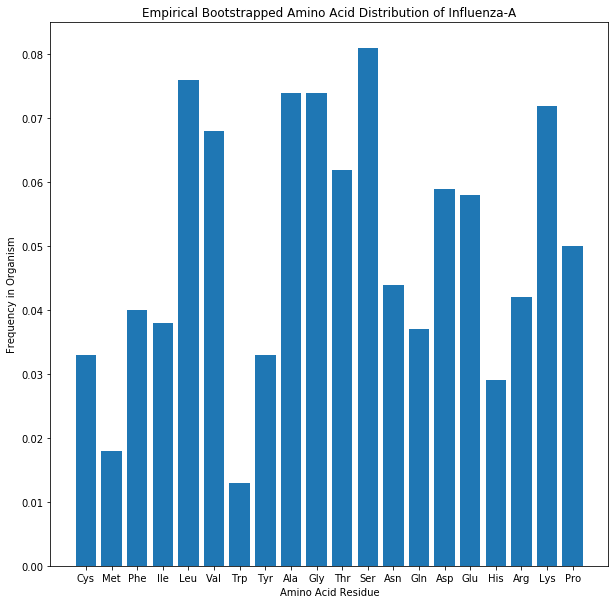

In [82]:
plt.figure(figsize=(10,10))
plt.xlabel('Amino Acid Residue')
plt.ylabel('Frequency in Organism')
plt.title('Empirical Bootstrapped Amino Acid Distribution of Influenza-A')
plt.bar(aa, freq)
plt.show()

### Model

$$
P_{recognized}(s) \propto \left(\prod_{i=1}^N f_{s_i}\right)\exp[- \beta^*E_0^*(s) ]
$$

#### Parameters


In [232]:
beta = -3.07
gamma = .94
beta_star = 0.49
gamma_star = 1.8


In [277]:
def f_a(s):
    return covid_freq[aa.index(s)] #return the frequence of AA
    #s is a string for three letter coding of amino acid

def epsilon(s): 
    return np.sum(np.multiply(freq,ie[s]))

def variance(s):
    return np.sum(np.multiply(freq,np.square(ie[s]))) - epsilon(s)**2

def f_a_sel(s):
    #equation 17
    numerator = f_a(s)*np.exp(-beta*(epsilon(s) - gamma*variance(s)))
    denominator = np.sum([f_a(a)*np.exp(-beta*(epsilon(a) - gamma*variance(a))) for a in aa])
    return numerator/denominator

sel_freq = [f_a_sel(i) for i in aa]

def epsilon_star(s):
    return np.sum(np.multiply(sel_freq,ie[s]))

def variance_star(s):
    return np.sum(np.multiply(sel_freq,np.square(ie[s]))) - epsilon_star(s)**2

ec_min = -6
ec_max = 0

def rho_ec():
    #Equation 2ish
    return 1/(ec_max - ec_min)

def rho_sel(e_c):
    #equation 18
    numerator = rho_ec()*np.exp(-beta*e_c)
    denominator = integrate.quad(lambda e: rho_ec()*np.exp(-beta*e), ec_min, ec_max)[0]
    return numerator/denominator

def mean_braces_ec():
    #Equation 22.25
    return integrate.quad(lambda e_c: e_c*rho_sel(e_c)*np.exp(-beta*e_c), ec_min, ec_max)[0]

def var_braces_ec():
    #Equation 22.50
    return integrate.quad(lambda e_c: (e_c**2)*rho_sel(e_c)*np.exp(-beta*e_c), ec_min, ec_max)[0] - mean_braces_ec()**2

def e_0(S, K):
    #S is an array
    #equation 20
    term1 = mean_braces_ec()
    term2 = np.sum([epsilon_star(s) for s in S])
    term3 = np.sqrt(2*np.log(K)*(var_braces_ec() + np.sum([variance_star(s) for s in S]) ))
    return term1 + term2 - term3

def p_rec(S, K):
    #S is an array
    #Equation 22.75
    numerator =  np.exp(-beta_star*e_0(S, K))
    denominator = numerator + np.exp(-beta_star*mean_braces_ec())
    return np.prod([f_a(s) for s in S])*numerator/denominator

def decode(S):
    #turn a string of one letter amino acid to the three letter codes
    decoded = []
    for s in S:
        decoded += [aa_map[s]]
    return decoded
    

### Testing on Random Distributions

In [278]:
p_rec(['Cys', 'Cys', "Val", 'Leu'], 1E6)

6.378372250442569e-06

(array([9.321e+03, 4.910e+02, 1.250e+02, 3.300e+01, 1.800e+01, 8.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.97407818e-06, 1.40418628e-03, 2.80339849e-03, 4.20261070e-03,
        5.60182290e-03, 7.00103511e-03, 8.40024732e-03, 9.79945952e-03,
        1.11986717e-02, 1.25978839e-02, 1.39970961e-02]),
 <a list of 10 Patch objects>)

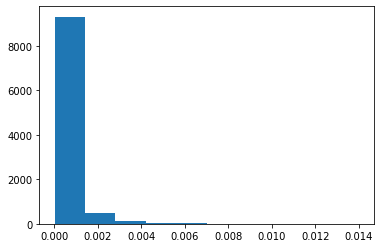

In [160]:
plt.hist([p_rec(np.random.choice(aa, 5, replace = True)) for i in range(10000)])

(array([914.,  63.,  14.,   4.,   3.,   0.,   0.,   1.,   0.,   1.]),
 array([1.05844531e-05, 1.23767529e-03, 2.46476613e-03, 3.69185696e-03,
        4.91894780e-03, 6.14603864e-03, 7.37312947e-03, 8.60022031e-03,
        9.82731115e-03, 1.10544020e-02, 1.22814928e-02]),
 <a list of 10 Patch objects>)

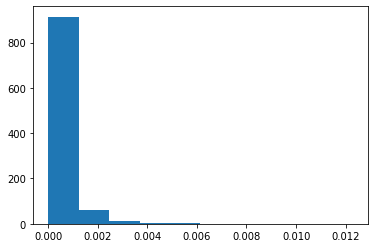

In [152]:
plt.hist([p_rec(np.random.choice(aa, 5, replace = True)) for i in range(1000)])

(array([53., 20., 16.,  4.,  1.,  2.,  3.,  0.,  0.,  1.]),
 array([1.50812899e-05, 2.39804747e-04, 4.64528205e-04, 6.89251662e-04,
        9.13975119e-04, 1.13869858e-03, 1.36342203e-03, 1.58814549e-03,
        1.81286895e-03, 2.03759241e-03, 2.26231586e-03]),
 <a list of 10 Patch objects>)

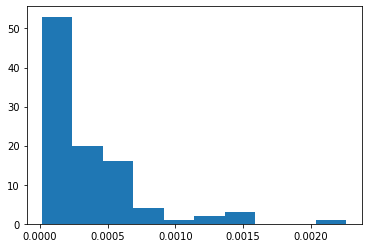

In [151]:
plt.hist([p_rec(np.random.choice(aa, 5, replace = True)) for i in range(100)])

### Testing on Influenza-A Spike Protein

In [154]:
spike= 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

array(['T', 'G', 'R', 'S', 'H'], dtype='<U1')

(array([27., 30., 19., 10.,  5.,  2.,  3.,  2.,  1.,  1.]),
 array([1.84673515e-08, 2.38406634e-07, 4.58345916e-07, 6.78285199e-07,
        8.98224481e-07, 1.11816376e-06, 1.33810305e-06, 1.55804233e-06,
        1.77798161e-06, 1.99792089e-06, 2.21786018e-06]),
 <a list of 10 Patch objects>)

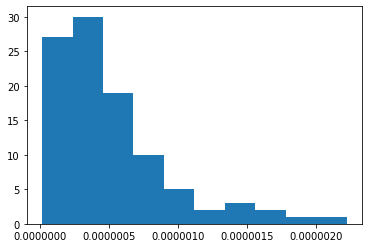

In [206]:
plt.hist([p_rec(np.random.choice(decode(spike), 5, replace = False)) for i in range(100)])

In [174]:
p_seq = 1/3200000
np.random.choice(aa, 5, replace = True)
expected_value = 1

### Testing on COVID-19

In [171]:
type(np.random.choice(aa, 5, replace = True))

numpy.ndarray

In [177]:
1/(p_seq*p_rec(np.random.choice(aa, 5, replace = True)))

33963595356.87084

In [188]:
-1/(np.log(1-p_rec(np.random.choice(aa, 5, replace = True)))/1E6)

32714023196.93773

In [207]:
1/p_rec(['Cys', 'His', 'Leu', 'Tyr', 'Thr'])

6722399.236087405

In [208]:
1 - e**-pN = prec

SyntaxError: can't assign to operator (<ipython-input-208-e269ce4893b2>, line 1)

In [210]:
np.log(1 - p_rec(['Cys', 'His', 'Leu', 'Tyr', 'Thr']))

-1.4875642447373734e-07

In [211]:
p_rec(['Cys', 'His', 'Leu', 'Tyr', 'Thr'])

1.48756413429266e-07

In [221]:
1-np.exp(-p_rec(['Cys', 'His', 'Leu', 'Tyr', 'Thr'])*100000000)

0.9999996535894979

In [241]:
prob = []
for i in np.arange(1, 1E8, 100000):
    prob += [1-np.exp(-p_rec(['Cys', 'His', 'Leu', 'Tyr', 'Thr'], i)*i)]
    


In [254]:
influenza_prob = []
for i in np.arange(1, 1E8, 100000):
    influenza_prob += [1-np.exp(-p_rec(['Val', 'Gln', 'Ile', 'Val', 'Ile'], i)*i)]

Text(0.5, 1.0, 'Repertoire Size vs. Probability of Detection')

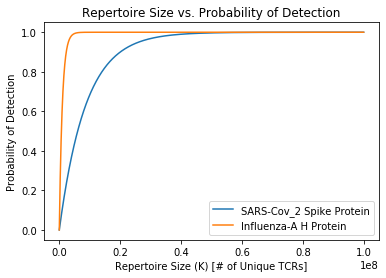

In [255]:
plt.plot(np.arange(1, 1E8, 100000), prob)
plt.plot(np.arange(1, 1E8, 100000), influenza_prob)
plt.legend(['SARS-Cov_2 Spike Protein', 'Influenza-A H Protein'])
plt.xlabel('Repertoire Size (K) [# of Unique TCRs]')
plt.ylabel('Probability of Detection')
plt.title('Repertoire Size vs. Probability of Detection')

Text(0.5, 1.0, 'Log Repertoire Size vs. Probability of Detection')

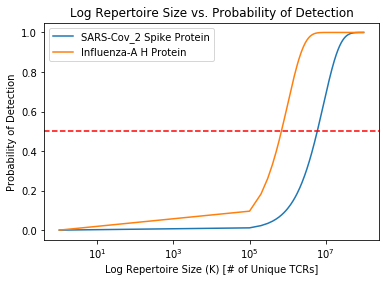

In [266]:
plt.plot(np.arange(1, 1E8, 100000), prob)
plt.plot(np.arange(1, 1E8, 100000), influenza_prob)
plt.xscale('log')
#plt.yscale('log')
plt.axhline(0.5, color = 'red', ls = '--')
plt.legend(['SARS-Cov_2 Spike Protein', 'Influenza-A H Protein'])
plt.xlabel('Log Repertoire Size (K) [# of Unique TCRs]')
plt.ylabel('Probability of Detection')
plt.title('Log Repertoire Size vs. Probability of Detection')

In [276]:
np.arange(1, 1E8, 100000)[7]

700001.0

In [275]:
influenza_prob.index(0.5060656758012414)

7

$$
P_{rec} = \left(\prod_{i=1}^N f_a \right) \frac{\exp[-\beta^*E_0^*]}{1 + \exp[-\beta^*E_0^*]}
$$

In [242]:
covid_freq = [0.031421838177533384,0.010997643362136685,
       0.060487038491751764, 0.05970149253731343, 0.08483896307934014,
       0.07619795758051846, 0.009426551453260016, 0.04241948153967007,
       0.062058130400628436, 0.06441476826394343, 0.07619795758051846,
       0.07776904948939513,0.06912804399057344, 0.04870384917517675, 
        0.04870384917517675,0.037706205813040065, 0.01335428122545169,
       0.032992930086410056, 0.047918303220738416, 0.04556166535742341]
influenza_freq= [0.026501766784452298, 0.012367491166077738, 0.03356890459363958, 0.0636042402826855, 0.0812720848056537, 0.06537102473498234, 0.0176678445229682, 0.04770318021201413, 0.06007067137809187, 0.0706713780918728, 0.06537102473498234, 0.08303886925795052, 0.07243816254416961, 0.026501766784452298, 0.044169611307420496, 0.061837455830388695, 0.026501766784452298, 0.03180212014134275, 0.07420494699646643, 0.03356890459363958]